# Plotting the Climate Data by AEZ and Month

This code comes from https://github.com/digitalearthafrica/thematic-layers/tree/main/CHPclim rainfall_AEZ.py and the climate data were retrieved using chpclim_download_and_cog.sh

In [1]:
import sys
import xarray as xr
import geopandas as gpd
from rasterio.features import rasterize
from affine import Affine
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

/env/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [7]:
precip = {}

In [8]:
def main(aez_name):
    aez = gpd.read_file(f'../Data/AEZs/{aez_name}.shp')
    bounds = aez.iloc[0].geometry.bounds
    
    months = np.arange(1,13)
    total_precip = np.zeros(len(months))
    
    for i, mon in enumerate(months):
        clim = f"../Data/Climate/deafrica_chpclim_50n_50s_{mon:02d}.tif"
        img_all = xr.open_rasterio(clim, chunks=dict(x=1000,y=1000)).squeeze('band')
        img = img_all.sel(x=slice(bounds[0], bounds[2]), y=slice(bounds[3],bounds[1]))

        res = img.x.values[1]-img.x.values[0]
        transform = Affine(res, 0.0, img.x.values[0], 0.0, -1*res, img.y.values[0])
        out_shape = len(img.y), len(img.x)
        
        arr = rasterize(shapes=aez.geometry,
                        out_shape=out_shape,
                        transform=transform,
                        fill=0,
                        all_touched=True,
                        default_value=1,
                        dtype=np.uint8)
        
        total_precip[i] = img.where(arr>0).mean().values
    precip[aez_name]=total_precip

In [9]:
main('Indian_ocean')
main('Central')
main('Eastern')
main('Western')
main('Northern')
main('Southern')
main('Sahel')

In [10]:
precip

{'Indian_ocean': array([364.00152588, 295.45391846, 204.60873413,  81.85170746,
         43.77248764,  32.64310837,  28.99595451,  23.53892517,
         23.63140678,  46.84788132,  81.67005157, 228.54644775]),
 'Central': array([111.52955627, 109.95933533, 151.11959839, 138.76022339,
        104.84160614,  75.19888306,  79.46554565,  98.41778564,
        126.1436615 , 177.14923096, 149.0761261 , 132.44407654]),
 'Eastern': array([ 61.9379921 ,  57.79542923,  93.69174194, 124.28340149,
         83.88930511,  47.85194397,  66.04802704,  71.53118134,
         53.46426392,  64.5925827 ,  69.77892303,  71.84043121]),
 'Western': array([  7.10575247,  17.35756493,  47.94775772,  83.28928375,
        137.00569153, 185.27236938, 226.19087219, 254.68803406,
        228.58918762, 139.30686951,  40.41984558,  12.91980743]),
 'Northern': array([13.05056   ,  9.64927101, 10.40167332,  7.7565732 ,  5.36857271,
         2.55349922,  0.83021122,  2.80175209,  6.44816256,  9.17953968,
        11.086433

In [11]:
df_precip = pd.DataFrame.from_dict(precip)
df_precip.to_csv('../Results/WOfS_Assessment/Point_Based/Africa_monthly_precip.csv')

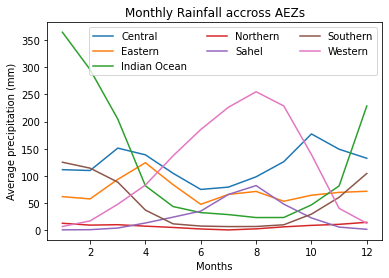

In [60]:
plt.plot(months, precip['Central'], label='Central')
plt.plot(months, precip['Eastern'], label='Eastern')
plt.plot(months, precip['Indian_ocean'], label='Indian Ocean')
plt.plot(months, precip['Northern'], label='Northern')
plt.plot(months, precip['Sahel'], label='Sahel')
plt.plot(months, precip['Southern'], label='Southern')
plt.plot(months, precip['Western'], label='Western')
plt.legend(ncol=3)#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Monthly Rainfall accross AEZs')
plt.xlabel('Months')
plt.ylabel('Average precipitation (mm)')
plt.savefig('All_AEZ_rainfall.png')

## Plotting the valid/clear obersvations

In [2]:

CEO = '../Results/WOfS_Assessment/Point_Based/ValidPoints_Per_AEZ/ValidationPoints_Central.csv'
input_data = pd.read_csv(CEO,delimiter=",")
input_data

,Unnamed: 0,PLOT_ID,LON,LAT,CLASS,MONTH,ACTUAL,CLASS_WET,CLEAR_OBS,PREDICTION
0,0,137711631.0,17.782114,7.802986,Open water - freshwater,8,0,1.0,2.0,1
1,1,137711631.0,17.782114,7.802986,Open water - freshwater,10,0,1.0,1.0,1
2,2,137711631.0,17.782114,7.802986,Open water - freshwater,1,1,1.0,2.0,1
3,3,137711631.0,17.782114,7.802986,Open water - freshwater,2,1,1.0,1.0,1
4,4,137711631.0,17.782114,7.802986,Open water - freshwater,3,1,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
2307,8703,137712354.0,6.631720,4.347916,Open water - marine,8,1,1.0,1.0,1
2308,8713,137712355.0,6.246484,4.329523,Open water - marine,3,1,1.0,1.0,1
2309,8714,137712355.0,6.246484,4.329523,Open water - marine,8,1,1.0,1.0,1
2310,8715,137712355.0,6.246484,4.329523,Open water - marine,11,1,1.0,1.0,1


In [3]:
input_data=input_data.drop(['Unnamed: 0'], axis=1)
input_data.head()

,PLOT_ID,LON,LAT,CLASS,MONTH,ACTUAL,CLASS_WET,CLEAR_OBS,PREDICTION
0,137711631.0,17.782114,7.802986,Open water - freshwater,8,0,1.0,2.0,1
1,137711631.0,17.782114,7.802986,Open water - freshwater,10,0,1.0,1.0,1
2,137711631.0,17.782114,7.802986,Open water - freshwater,1,1,1.0,2.0,1
3,137711631.0,17.782114,7.802986,Open water - freshwater,2,1,1.0,1.0,1
4,137711631.0,17.782114,7.802986,Open water - freshwater,3,1,1.0,2.0,1


In [4]:
input_data['CL_OBS_count'] = input_data.groupby('MONTH')['CLEAR_OBS'].transform('count')

In [6]:
input_data[:20]

,PLOT_ID,LON,LAT,CLASS,MONTH,ACTUAL,CLASS_WET,CLEAR_OBS,PREDICTION,CL_OBS_count
0,137711631.0,17.782114,7.802986,Open water - freshwater,8,0,1.0,2.0,1,195
1,137711631.0,17.782114,7.802986,Open water - freshwater,10,0,1.0,1.0,1,195
2,137711631.0,17.782114,7.802986,Open water - freshwater,1,1,1.0,2.0,1,259
3,137711631.0,17.782114,7.802986,Open water - freshwater,2,1,1.0,1.0,1,166
4,137711631.0,17.782114,7.802986,Open water - freshwater,3,1,1.0,2.0,1,215
5,137711631.0,17.782114,7.802986,Open water - freshwater,5,1,0.0,1.0,0,173
6,137711632.0,17.982660,7.455957,Open water - freshwater,1,1,1.0,1.0,1,259
7,137711632.0,17.982660,7.455957,Open water - freshwater,6,1,1.0,1.0,1,230
8,137711633.0,24.357867,6.961847,Open water - freshwater,10,0,1.0,1.0,1,195
9,137711633.0,24.357867,6.961847,Open water - freshwater,12,0,1.0,2.0,1,214


In [26]:
#import calendar 
#input_data['MONTH'] = input_data['MONTH'].apply(lambda x: calendar.month_abbr[x])
#input_data.reindex(input_data.MONTH.map(d).sort_values().index) #map + sort_values + reindex with index
sorted_data = input_data.sort_values(['MONTH'])
#sorted_data
#df[~df.month.duplicated(keep='first')]
for_plot = sorted_data[~sorted_data.MONTH.duplicated(keep='first')]
for_plot

,PLOT_ID,LON,LAT,CLASS,MONTH,ACTUAL,CLASS_WET,CLEAR_OBS,PREDICTION,CL_OBS_count
495,137711852.0,13.189751,-15.253757,Forest/woodlands,1,0,0.0,1.0,0,259
1549,137712075.0,27.182621,-31.577636,Open water - Constructed (e.g. aquaculture),2,1,1.0,2.0,1,166
1506,137712067.0,22.677628,-30.048280,Barren (Bare soil / Rocky Land),3,0,0.0,1.0,0,215
717,137711898.0,23.482924,-15.594714,Open water - Constructed (e.g. aquaculture),4,1,1.0,1.0,1,106
1686,137712103.0,19.040738,-34.119796,Open water - Constructed (e.g. aquaculture),5,1,0.0,1.0,0,173
1442,137712057.0,26.575385,-28.979496,Open water - Constructed (e.g. aquaculture),6,1,1.0,1.0,1,230
318,137711793.0,16.720616,-6.326997,Open water - freshwater,7,1,1.0,1.0,1,200
1637,137712090.0,22.029661,-33.106002,Barren (Bare soil / Rocky Land),8,0,0.0,1.0,0,195
1390,137712047.0,16.722170,-28.416370,Barren (Bare soil / Rocky Land),9,0,0.0,1.0,0,157
806,137711915.0,35.241487,-17.201347,Cultivated (Cropland/ Plantation),10,0,0.0,1.0,0,195


In [27]:
valid_pts = {}
def sort_for_plot(aez_name):
    #CEO = f'../Results/WOfS_Assessment/Point_Based/ValidPoints_Per_AEZ/ValidationPoints_{aez_name}.csv'
    #CEO = f'../Results/WOfS_Assessment/Point_Based/{aez_name}_LS_terrain_WOfS.csv'
    CEO = f'../Results/WOfS_Assessment/Point_Based/Intermediate_Per_AEZ/ValidationPoints_{aez_name}_terrain.csv'
    input_data = pd.read_csv(CEO,delimiter=",")
    input_data=input_data.drop(['Unnamed: 0'], axis=1)
    input_data['CL_OBS_count'] = input_data.groupby('MONTH')['CLEAR_OBS'].transform('count')
    sorted_data = input_data.sort_values(['MONTH'])
    for_plot = sorted_data[~sorted_data.MONTH.duplicated(keep='first')]
    valid_pts[aez_name] = for_plot.CL_OBS_count.values

In [28]:
sort_for_plot('Indian_ocean')
sort_for_plot('Central')
sort_for_plot('Sahel')
sort_for_plot('Southern')
sort_for_plot('Northern')
sort_for_plot('Eastern')
sort_for_plot('Western')

In [20]:
valid_pts['Southern']=valid_pts['Southern'][:12]

In [29]:
valid_pts

{'Indian_ocean': array([ 24, 154, 138, 127, 226, 201, 152, 169, 106, 216, 180, 103]),
 'Central': array([12, 24, 21, 15, 41, 58, 60, 63, 56, 43, 28, 29]),
 'Sahel': array([ 37,  74, 135, 122,  99,  59,  38,  58,  56,  85, 118,  95]),
 'Southern': array([ 89, 105, 118, 101, 186, 240, 212, 220, 207, 175, 157, 132]),
 'Northern': array([ 52,  73, 117, 131,  67,  86,  79, 148, 123, 115,  76, 104]),
 'Eastern': array([ 87, 236,  80, 140, 214, 179, 183, 177, 197, 226, 140, 171]),
 'Western': array([ 63,  82, 148,  54,  68,  30,   8,   6,   1,  38,  68, 172])}

In [30]:
df_valid = pd.DataFrame.from_dict(valid_pts)
df_valid.to_csv('../Results/WOfS_Assessment/Point_Based/Africa_LS_terrain_monthly_valid.csv')

In [31]:
months = np.arange(1,13)

KeyError: 'IndianOcean'

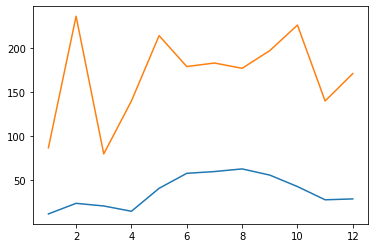

In [32]:
plt.plot(months, valid_pts['Central'], label='Central')
plt.plot(months, valid_pts['Eastern'], label='Eastern')
plt.plot(months, valid_pts['IndianOcean'], label='Indian Ocean')
plt.plot(months, valid_pts['Northern'], label='Northern')
plt.plot(months, valid_pts['Sahel'], label='Sahel')
plt.plot(months, valid_pts['Southern'], label='Southern')
plt.plot(months, valid_pts['Western'], label='Western')
plt.ylim(0,450)
plt.legend(ncol=3, loc='upper center', borderaxespad=0.)
plt.title('Valid points accross AEZs')
plt.xlabel('Months')
plt.ylabel('Number of Valid Points')
plt.savefig('All_AEZ_valid.png')

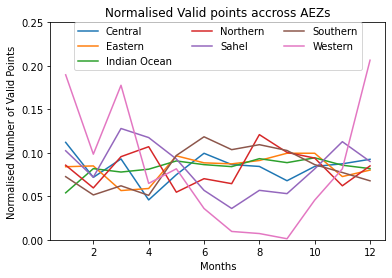

In [8]:
plt.plot(months, valid_pts['Central']/sum(valid_pts['Central']), label='Central')
plt.plot(months, valid_pts['Eastern']/sum(valid_pts['Eastern']), label='Eastern')
plt.plot(months, valid_pts['IndianOcean']/sum(valid_pts['IndianOcean']), label='Indian Ocean')
plt.plot(months, valid_pts['Northern']/sum(valid_pts['Northern']), label='Northern')
plt.plot(months, valid_pts['Sahel']/sum(valid_pts['Sahel']), label='Sahel')
plt.plot(months, valid_pts['Southern']/sum(valid_pts['Southern']), label='Southern')
plt.plot(months, valid_pts['Western']/sum(valid_pts['Western']), label='Western')
plt.ylim(0,0.25)
plt.legend(ncol=3, loc='upper center', borderaxespad=0.)
plt.title('Normalised Valid points accross AEZs')
plt.xlabel('Months')
plt.ylabel('Normalised Number of Valid Points')
plt.savefig('All_AEZ_valid_norm.png')

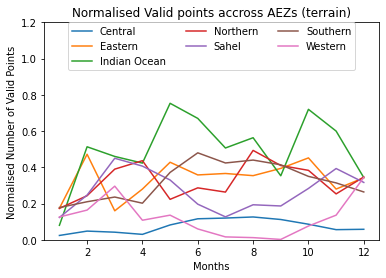

In [35]:
plt.plot(months, valid_pts['Central']/500, label='Central')
plt.plot(months, valid_pts['Eastern']/500, label='Eastern')
plt.plot(months, valid_pts['Indian_ocean']/300, label='Indian Ocean')
plt.plot(months, valid_pts['Northern']/300, label='Northern')
plt.plot(months, valid_pts['Sahel']/300, label='Sahel')
plt.plot(months, valid_pts['Southern']/500, label='Southern')
plt.plot(months, valid_pts['Western']/500, label='Western')
plt.ylim(0,1.2)
plt.legend(ncol=3, loc='upper center', borderaxespad=0.)
plt.title('Normalised Valid points accross AEZs (terrain)')
plt.xlabel('Months')
plt.ylabel('Normalised Number of Valid Points')
plt.savefig('terrain_All_AEZ_valid_total_norm.png')

,PLOT_ID,LON,LAT,CLASS,MONTH,ACTUAL,CLASS_WET,CLEAR_OBS,PREDICTION,CL_OBS_count
0,137711631.0,17.782114,7.802986,Open water - freshwater,8,0,1.0,2.0,1,195
1,137711631.0,17.782114,7.802986,Open water - freshwater,10,0,1.0,1.0,1,195
2,137711631.0,17.782114,7.802986,Open water - freshwater,1,1,1.0,2.0,1,259
3,137711631.0,17.782114,7.802986,Open water - freshwater,2,1,1.0,1.0,1,166
4,137711631.0,17.782114,7.802986,Open water - freshwater,3,1,1.0,2.0,1,215
...,...,...,...,...,...,...,...,...,...,...
2307,137712354.0,6.631720,4.347916,Open water - marine,8,1,1.0,1.0,1,195
2308,137712355.0,6.246484,4.329523,Open water - marine,3,1,1.0,1.0,1,215
2309,137712355.0,6.246484,4.329523,Open water - marine,8,1,1.0,1.0,1,195
2310,137712355.0,6.246484,4.329523,Open water - marine,11,1,1.0,1.0,1,202
